In [133]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
y_symbols= ['AAPL']
from datetime import datetime
startdate = datetime(2010,1,1)
enddate = datetime(2022,12,31)
data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

[*********************100%%**********************]  1 of 1 completed


In [134]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395378,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [135]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059372,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.378006,77034200


In [136]:
data = data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395378,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [137]:
data = data.drop(['Date', 'Adj Close'], axis=1)
data.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


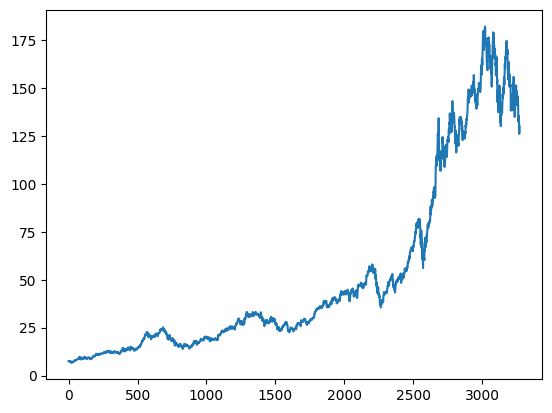

In [138]:
plt.plot(data.Close)

In [139]:
data

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3267,130.919998,132.419998,129.639999,131.860001,63814900
3268,131.380005,131.410004,128.720001,130.029999,69007800
3269,129.669998,131.029999,125.870003,126.040001,85438400
3270,127.989998,130.479996,127.730003,129.610001,75703700


In [140]:
ma100 = data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

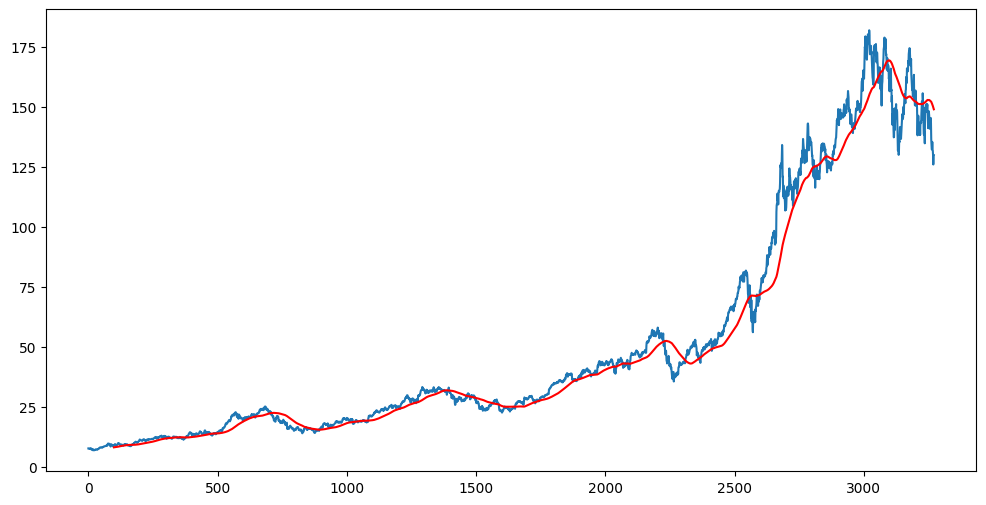

In [141]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')

In [142]:
ma200 = data.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    152.1331
3268    152.0096
3269    151.8867
3270    151.7593
3271    151.6110
Name: Close, Length: 3272, dtype: float64

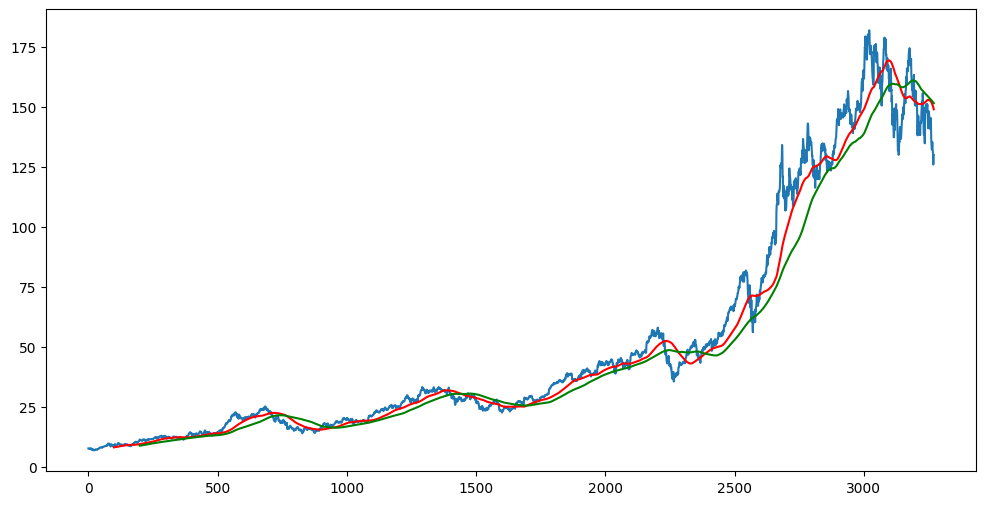

In [143]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [144]:
data.shape

(3272, 5)

In [145]:
data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.70): int(len(data))])

print(data_training.shape)
print(data_testing.shape)


(2290, 1)
(982, 1)


In [146]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [147]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [150]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [151]:
data_training_array.shape

(2290, 1)

In [152]:
from re import X
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [154]:
x_train.shape

(2190, 100, 1)

In [153]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [155]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [156]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [157]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
69/69 [==============================] - 25s 286ms/step - loss: 0.0329
Epoch 2/50
69/69 [==============================] - 19s 270ms/step - loss: 0.0068
Epoch 3/50
69/69 [==============================] - 20s 285ms/step - loss: 0.0068
Epoch 4/50
69/69 [==============================] - 19s 271ms/step - loss: 0.0055
Epoch 5/50
69/69 [==============================] - 20s 295ms/step - loss: 0.0050
Epoch 6/50
69/69 [==============================] - 19s 275ms/step - loss: 0.0044
Epoch 7/50
69/69 [==============================] - 20s 286ms/step - loss: 0.0043
Epoch 8/50
69/69 [==============================] - 19s 270ms/step - loss: 0.0034
Epoch 9/50
69/69 [==============================] - 20s 287ms/step - loss: 0.0046
Epoch 10/50
69/69 [==============================] - 19s 270ms/step - loss: 0.0039
Epoch 11/50
69/69 [==============================] - 20s 286ms/step - loss: 0.0039
Epoch 12/50
69/69 [==============================] - 19s 268ms/step - loss: 0.0034
Epoch 13/50
6

In [179]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [159]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [160]:
data_training.tail(100)

,Close
2190,55.959999
2191,54.470001
2192,54.560001
2193,54.592499
2194,55.007500
...,...
2285,41.630001
2286,42.812500
2287,43.544998
2288,43.560001


In [161]:
past_100_days = data_testing.tail(100)

In [162]:
import pandas as pd

In [163]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [165]:
final_df.head()

,Close
0,169.240005
1,168.490005
2,172.100006
3,173.190002
4,173.029999


In [166]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.90855882],
       [0.90318835],
       [0.92903823],
       ...,
       [0.59921953],
       [0.62478298],
       [0.62707432]])

In [167]:
input_data.shape

(1082, 1)

In [168]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [169]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [170]:
y_predicted = model.predict(x_test)

31/31 [==============================] - 4s 128ms/step


In [171]:
y_predicted.shape

(982, 1)

In [172]:
y_test

array([0.00175437, 0.        , 0.00261364, 0.00134262, 0.00245253,
       0.00177227, 0.00268524, 0.00465442, 0.00291797, 0.00633717,
       0.00859276, 0.00877179, 0.00973846, 0.00665939, 0.00991749,
       0.01149284, 0.01091997, 0.00911192, 0.0054958 , 0.00622977,
       0.0169528 , 0.02055103, 0.02198316, 0.02559926, 0.02987774,
       0.03327905, 0.03061171, 0.03352967, 0.04593545, 0.03870323,
       0.03456797, 0.03107714, 0.03408462, 0.03453216, 0.03673404,
       0.03904336, 0.04402   , 0.04640091, 0.04700956, 0.04935466,
       0.05490416, 0.05383006, 0.05583502, 0.05284546, 0.05270225,
       0.05334671, 0.05338252, 0.06032834, 0.06163515, 0.06283455,
       0.06811551, 0.06754267, 0.06417717, 0.06242282, 0.06297776,
       0.05592454, 0.0735576 , 0.07110507, 0.07575949, 0.06990567,
       0.05984499, 0.05991658, 0.05601405, 0.04967688, 0.02916169,
       0.03442475, 0.0384705 , 0.03696677, 0.0350334 , 0.02445356,
       0.03073703, 0.02389862, 0.01831333, 0.01707812, 0.01575

In [173]:
y_predicted

array([[0.6344272 ],
       [0.62187606],
       [0.60198903],
       [0.57475245],
       [0.541959  ],
       [0.50264   ],
       [0.46072847],
       [0.42286897],
       [0.3906548 ],
       [0.362013  ],
       [0.3341641 ],
       [0.30745715],
       [0.28183872],
       [0.25810808],
       [0.23668157],
       [0.21767858],
       [0.20101628],
       [0.18650952],
       [0.17392847],
       [0.1630347 ],
       [0.15361317],
       [0.14549305],
       [0.13853103],
       [0.13260154],
       [0.12760298],
       [0.1234585 ],
       [0.12010217],
       [0.11745253],
       [0.11543265],
       [0.11399513],
       [0.11306962],
       [0.11255875],
       [0.11235711],
       [0.112377  ],
       [0.11254528],
       [0.112809  ],
       [0.11314188],
       [0.1135371 ],
       [0.11399917],
       [0.11453094],
       [0.11513563],
       [0.11582685],
       [0.11660808],
       [0.11747578],
       [0.11840886],
       [0.11937726],
       [0.12035203],
       [0.121

In [176]:
scaler.scale_

array([0.00716063])

In [177]:
scale_factor = 1/0.00716063
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

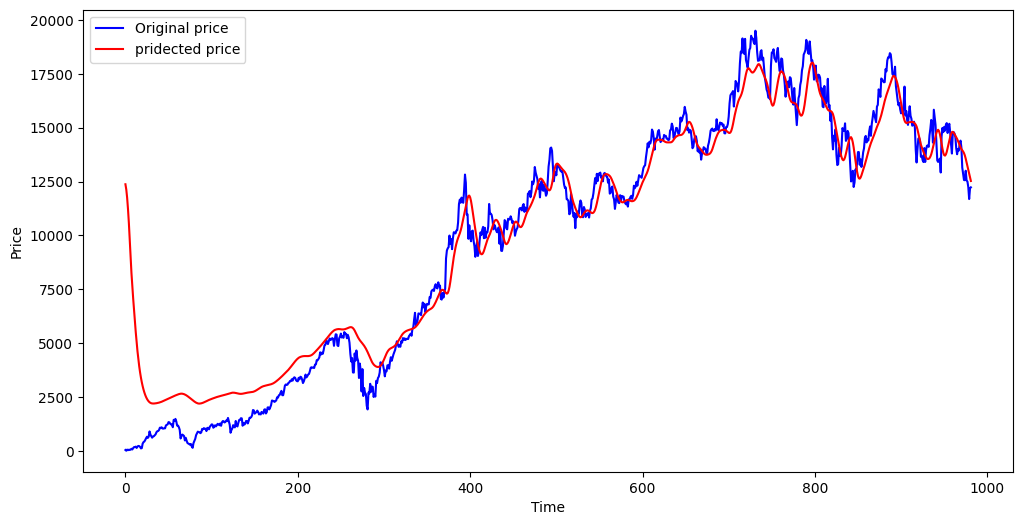

In [178]:
from pandas.io.formats.style import plt
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original price')
plt.plot(y_predicted, 'r', label = 'pridected price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()